In [1]:
import os
from dotenv import load_dotenv
import requests
import json
from matplotlib import pyplot as plt


In [2]:
# Load environment variables from .env
load_dotenv()

# Access the API_KEY
api_key = os.getenv("API_KEY")

# Your API endpoint URL and payload
url = 'https://1ffccx3cgg.execute-api.us-east-1.amazonaws.com/default/TransactionProcessor_test'
payload = {
    "queryExecutionId": "b27c6acb-b659-40df-abac-781ef585bceb",
    "depDate":"11/17/2023"
          }
headers = {"x-api-key": api_key}

# Make the API call
r = requests.get(url, data=json.dumps(payload), headers=headers)

print(r.json())

{'UpdateCount': 0, 'ResultSet': {'Rows': [{'Data': [{'VarCharValue': 'card'}, {'VarCharValue': 'purchaseamount'}, {'VarCharValue': 'merchantdetails'}, {'VarCharValue': 'date'}, {'VarCharValue': 'update'}, {'VarCharValue': 'depdate'}, {'VarCharValue': 'time'}, {'VarCharValue': 'ccpay'}, {'VarCharValue': 'subject'}, {'VarCharValue': 'purchrange'}, {'VarCharValue': 'day_of_the_week'}]}, {'Data': [{'VarCharValue': '8083'}, {'VarCharValue': '4.97'}, {'VarCharValue': 'CVS/PHARMACY #02 02756--2 in Broomall UNITED STATES '}, {'VarCharValue': '11/22/2023'}, {'VarCharValue': '2023-11-22T20:08:04.881Z'}, {'VarCharValue': '11/17/2023'}, {'VarCharValue': '03:06 PM'}, {'VarCharValue': '0.0'}, {'VarCharValue': 'Wells Fargo card purchase exceeded preset amount'}, {'VarCharValue': 'sml'}, {'VarCharValue': 'Wednesday'}]}, {'Data': [{'VarCharValue': '8083'}, {'VarCharValue': '13.13'}, {'VarCharValue': 'DUNKIN #357086 in BROOMALL UNITED STATES '}, {'VarCharValue': '11/18/2023'}, {'VarCharValue': '2023-11-

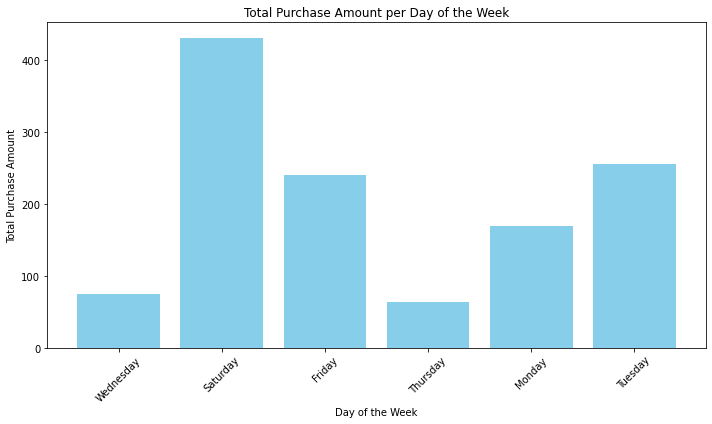

In [3]:
# Check the response status
if r.status_code == 200:
    # Extract JSON data from the response content
    response_json = r.json()

    # Extracting purchase amounts and days of the week
    data_rows = response_json['ResultSet']['Rows']
    purchase_amounts = [float(row['Data'][1]['VarCharValue']) for row in data_rows[1:]]
    days_of_week = [row['Data'][-1]['VarCharValue'] for row in data_rows[1:]]

    # Calculating total purchase amounts for each day
    daily_totals = {}
    for day, amount in zip(days_of_week, purchase_amounts):
        if day in daily_totals:
            daily_totals[day] += amount
        else:
            daily_totals[day] = amount

    # Creating the bar chart
    days = list(daily_totals.keys())
    totals = list(daily_totals.values())

    plt.figure(figsize=(10, 6))
    plt.bar(days, totals, color='skyblue')
    plt.xlabel('Day of the Week')
    plt.ylabel('Total Purchase Amount')
    plt.title('Total Purchase Amount per Day of the Week')
    plt.xticks(rotation=45)
    plt.tight_layout()

    # Show the plot
    plt.show()
else:
    print(f"Failed to fetch data. Status code: {r.status_code}")

In [4]:
print(data_rows)

[{'Data': [{'VarCharValue': 'card'}, {'VarCharValue': 'purchaseamount'}, {'VarCharValue': 'merchantdetails'}, {'VarCharValue': 'date'}, {'VarCharValue': 'update'}, {'VarCharValue': 'depdate'}, {'VarCharValue': 'time'}, {'VarCharValue': 'ccpay'}, {'VarCharValue': 'subject'}, {'VarCharValue': 'purchrange'}, {'VarCharValue': 'day_of_the_week'}]}, {'Data': [{'VarCharValue': '8083'}, {'VarCharValue': '4.97'}, {'VarCharValue': 'CVS/PHARMACY #02 02756--2 in Broomall UNITED STATES '}, {'VarCharValue': '11/22/2023'}, {'VarCharValue': '2023-11-22T20:08:04.881Z'}, {'VarCharValue': '11/17/2023'}, {'VarCharValue': '03:06 PM'}, {'VarCharValue': '0.0'}, {'VarCharValue': 'Wells Fargo card purchase exceeded preset amount'}, {'VarCharValue': 'sml'}, {'VarCharValue': 'Wednesday'}]}, {'Data': [{'VarCharValue': '8083'}, {'VarCharValue': '13.13'}, {'VarCharValue': 'DUNKIN #357086 in BROOMALL UNITED STATES '}, {'VarCharValue': '11/18/2023'}, {'VarCharValue': '2023-11-21T01:33:04.427Z'}, {'VarCharValue': '11/